# SE42 Foundations of Data Science - Data Science Salary Analysis

**Name:** Jona Schwarz

**Motivation and Goal**: This analysis aims to explore the salary in different areas of data science worldwide in the recent years. Due to my interest in the field and a possible carrer, I would like to explore the factors which influence compensation, as well as the development over the years.

**Research Questions**
* How do experience levels impact data science salaries?
* What is the relationship between company size and compensation?
* Which job titles relate to the highest salary?
* How have the salaries in data science evolved from 2021 - 2024?

**Dataset**: "Data Science Salaries 2024" from Kaggle is the dataset underlying the analysis

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skimpy import skim

df = pd.read_csv("DataScience_salaries_2024.csv")

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 14838  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ work_year       │   0 │     0 │    2023 │  0.7008 │   2020 │    2023 │   2023 │   2024 │     2024 │    ▂▇▅ │  │
│ │ salary          │   0 │     0 │  165000 │  356200 │  14000 │  102100 │ 142200 │ 187500 │ 30400000 │   ▇    │  │
│ │ salary_in_usd   │   0 │     0 │  149900 │   69010 │  15000 │  102000 │ 141300 │ 185900 │   800000 │  ▇▆▁   │  │
│ │ remote_ratio    │   0 │     0 │   32.76 │   46.49 │      0 │       0 │      0 │    100 │      100 │ ▇    ▃ │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                14838 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                14838 │  │
│ │ job_title                          │      0 │         0 │                       2.2 │                33024 │  │
│ │ salary_currency                    │      0 │         0 │                         1 │                14838 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                14838 │  │
│ │ company_location                   │      0 │         0 │                         1 │                14838 │  │
│ │ company_size                       │      0 │         0 │                         1 │                14838 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Correlation Matrix




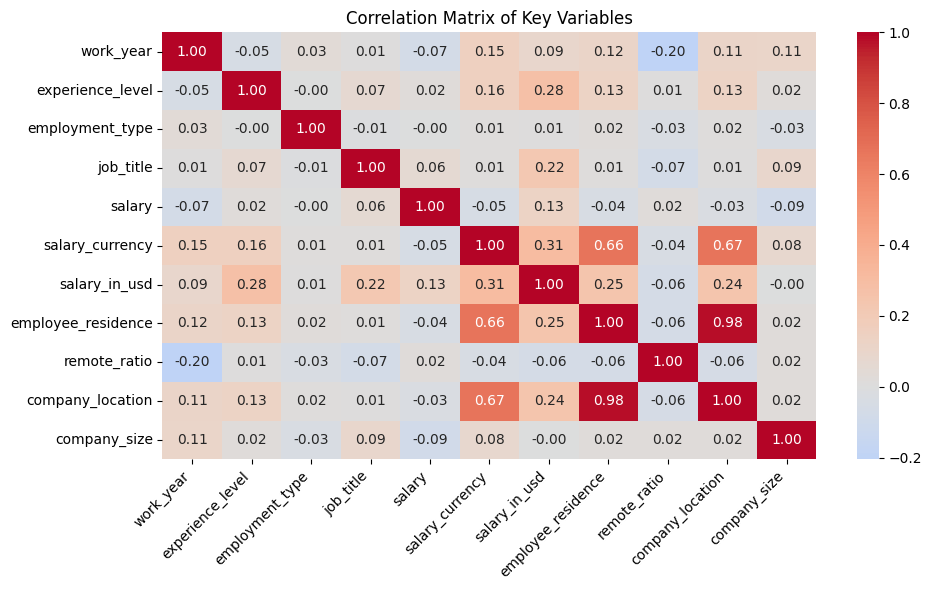

In [2]:
df_encoded = df.copy()
categorical_columns = ['experience_level', 'employment_type', 'job_title', 
                      'employee_residence', 'company_location', 'company_size',
                      'salary_currency']
for column in categorical_columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()

**Figure X**: Correlation heatmap showing the relationships between the variables in the dataset. The strength of the correlation can be derived by the numerical value as well as the color (red showing positive, blue showing negative correlations ).

Following correlations stand out:
* employee residence and company location
* employee residence and salary currency
* salary currency and company location

However, those are not really meaningful, because naturally the residence of the employee will correlate to the location of the company and the currency of the salary. The same applies to the currency of the salary and the location of the company. Of course there are cases where this does not apply e.g. working remotely etc..

Interesting correlations on the second look:
* experience level and salary in usd
* job title and salary in usd
* work year and remote ratio

# Salary by experience level

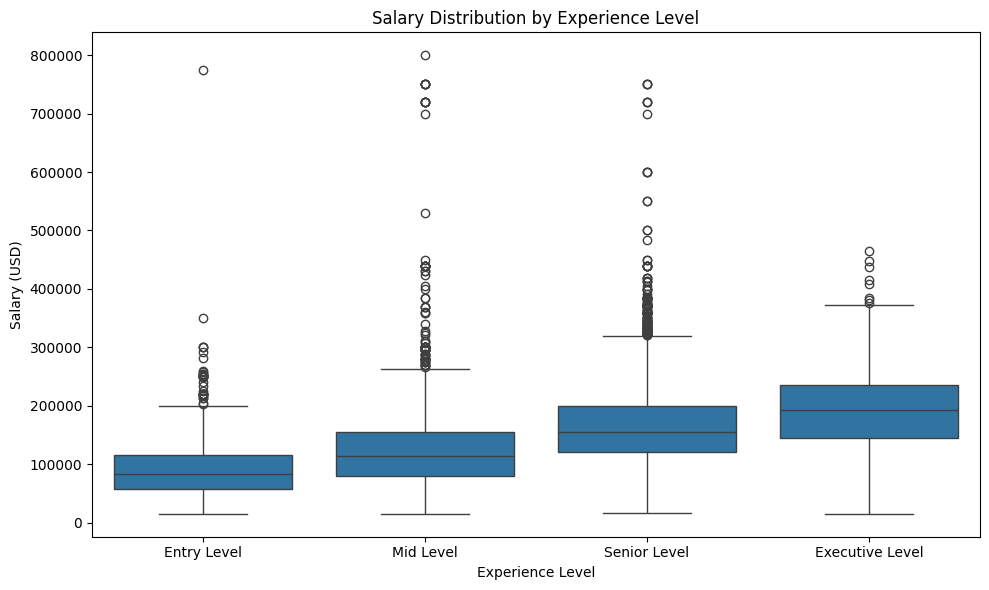

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(ticks=['EN', 'MI', 'SE', 'EX'], labels=['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level'], rotation=0)
plt.tight_layout()

**Figure X:** Box plot showing the salary distributions across different experience levels. The middle line represents the median salary, the box boundaries indicate first and third quartiles. The rest of the distribution is shown by the whiskers, outliers are represented by the points beyond the whiskers.

The plot indicates a clear progression in the median salary as the seniority increases. Mid and Senior level positions have the largest spread, while Entry and Executive level positions show a rather concentrated range of salary. Interesting to note is the fact, that despite the lower median salary, some salaries in the Entry and Mid level positions appear to exceed those in the Mid and Senior Level.